In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [4]:
train_set.sample(4,random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [5]:
test_set.sample(4,random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K.
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K.
9933,54,Local-gov,116428,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


In [6]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
combine=[train_set,test_set]

In [9]:
pd.DataFrame([train_set.dtypes,test_set.dtypes],index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [10]:
for column in train_set.columns:
    #print(column)
    if train_set[column].dtypes == 'object':
        print(column)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [11]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
X_train = train_set.copy()
X_test = test_set.copy() 

In [13]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [14]:
dict_sex1 ={}
count =0
for i in X_train.sex.unique():
    dict_sex1[i] = count
    count +=1
print(dict_sex1)

{' Male': 0, ' Female': 1}


In [15]:
# workclass
# education
# marital_status
# occupation
# relationship
# race
# sex
# native_country
# wage_class

In [16]:
dict_workclass ={}
count =0
for i in X_train.workclass.unique():
    dict_workclass[i] = count
    count +=1
print(dict_workclass)

{' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' ?': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8}


In [17]:
dict_education ={}
count =0
for i in X_train.education.unique():
    dict_education[i] = count
    count +=1
print(dict_education)

{' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7, ' 7th-8th': 8, ' Doctorate': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' 1st-4th': 13, ' Preschool': 14, ' 12th': 15}


In [18]:
dict_marital_status ={}
count =0
for i in X_train.marital_status.unique():
    dict_marital_status[i] = count
    count +=1
print(dict_marital_status)

{' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}


In [19]:
dict_occupation1 ={}
count =0
for i in X_train.occupation.unique():
    dict_occupation1[i] = count
    count +=1
print(dict_occupation1)

{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10, ' ?': 11, ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}


In [20]:
dict_relationship ={}
count =0
for i in X_train.relationship.unique():
    dict_relationship[i] = count
    count +=1
print(dict_relationship)

{' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}


In [21]:
dict_race ={}
count =0
for i in X_train.race.unique():
    dict_race[i] = count
    count +=1
print(dict_race)

{' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}


In [22]:
dict_native_country ={}
count =0
for i in X_train.native_country.unique():
    dict_native_country[i] = count
    count +=1
print(dict_native_country)

{' United-States': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' ?': 4, ' Mexico': 5, ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8, ' England': 9, ' Canada': 10, ' Germany': 11, ' Iran': 12, ' Philippines': 13, ' Italy': 14, ' Poland': 15, ' Columbia': 16, ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20, ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24, ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28, ' Japan': 29, ' Yugoslavia': 30, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33, ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36, ' Vietnam': 37, ' Hong': 38, ' Ireland': 39, ' Hungary': 40, ' Holand-Netherlands': 41}


In [23]:
dict_wage_class ={}
count =0
for i in X_train.wage_class.unique():
    dict_wage_class[i] = count
    count +=1
print(dict_wage_class)

{' <=50K': 0, ' >50K': 1}


In [24]:
dict_sex1

{' Male': 0, ' Female': 1}

In [25]:
X_train['sex'] = X_train['sex'].map(dict_sex1)
X_train['workclass'] = X_train['workclass'].map(dict_workclass)
X_train['education'] = X_train['education'].map(dict_education)
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status)
X_train['relationship'] = X_train['relationship'].map(dict_relationship)
X_train['race'] = X_train['race'].map(dict_race)
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class)
X_train['occupation'] = X_train['occupation'].map(dict_occupation1)

In [26]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [27]:
Xtrain = X_train.astype(int)

In [28]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [29]:
X_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [30]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [31]:
dict_sex1 ={}
count =0
for i in X_test.sex.unique():
    dict_sex1[i] = count
    count +=1
print(dict_sex1)


dict_education ={}
count =0
for i in X_test.education.unique():
    dict_education[i] = count
    count +=1
print(dict_education)

dict_marital_status ={}
count =0
for i in X_test.marital_status.unique():
    dict_marital_status[i] = count
    count +=1
print(dict_marital_status)


dict_occupation1 ={}
count =0
for i in X_test.occupation.unique():
    dict_occupation1[i] = count
    count +=1
print(dict_occupation1)

dict_workclass ={}
count =0
for i in X_test.workclass.unique():
    dict_workclass[i] = count
    count +=1
print(dict_workclass)


dict_relationship ={}
count =0
for i in X_test.relationship.unique():
    dict_relationship[i] = count
    count +=1
print(dict_relationship)

dict_race ={}
count =0
for i in X_test.race.unique():
    dict_race[i] = count
    count +=1
print(dict_race)

dict_native_country ={}
count =0
for i in X_test.native_country.unique():
    dict_native_country[i] = count
    count +=1
print(dict_native_country)

dict_wage_class ={}
count =0
for i in X_test.wage_class.unique():
    dict_wage_class[i] = count
    count +=1
print(dict_wage_class)

{' Male': 0, ' Female': 1}
{' 11th': 0, ' HS-grad': 1, ' Assoc-acdm': 2, ' Some-college': 3, ' 10th': 4, ' Prof-school': 5, ' 7th-8th': 6, ' Bachelors': 7, ' Masters': 8, ' Doctorate': 9, ' 5th-6th': 10, ' Assoc-voc': 11, ' 9th': 12, ' 12th': 13, ' 1st-4th': 14, ' Preschool': 15}
{' Never-married': 0, ' Married-civ-spouse': 1, ' Widowed': 2, ' Divorced': 3, ' Separated': 4, ' Married-spouse-absent': 5, ' Married-AF-spouse': 6}
{' Machine-op-inspct': 0, ' Farming-fishing': 1, ' Protective-serv': 2, ' ?': 3, ' Other-service': 4, ' Prof-specialty': 5, ' Craft-repair': 6, ' Adm-clerical': 7, ' Exec-managerial': 8, ' Tech-support': 9, ' Sales': 10, ' Priv-house-serv': 11, ' Transport-moving': 12, ' Handlers-cleaners': 13, ' Armed-Forces': 14}
{' Private': 0, ' Local-gov': 1, ' ?': 2, ' Self-emp-not-inc': 3, ' Federal-gov': 4, ' State-gov': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8}
{' Own-child': 0, ' Husband': 1, ' Not-in-family': 2, ' Unmarried': 3, ' Wife': 4, ' Other-

In [32]:
X_test['sex'] = X_test['sex'].map(dict_sex1)
X_test['workclass'] = X_test['workclass'].map(dict_workclass)
X_test['education'] = X_test['education'].map(dict_education)
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status)
X_test['relationship'] = X_test['relationship'].map(dict_relationship)
X_test['race'] = X_test['race'].map(dict_race)
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class)
X_test['occupation'] = X_test['occupation'].map(dict_occupation1)

In [33]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,3,10,1,0,1,0,0,7688,0,40,0,1
4,18,2,103497,3,10,0,3,0,1,1,0,0,30,0,0


In [34]:
X_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,0.969351,1.894357e+05,4.084639,10.072907,1.116455,6.411768,1.584239,0.979485,0.332965,1081.905104,87.899269,40.392236,1.219151,0.236226
std,13.849187,1.707976,1.057149e+05,3.446229,2.567545,1.182208,3.302738,1.194189,0.496000,0.471289,7583.935968,403.105286,12.479332,4.963702,0.424776
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.167360e+05,1.000000,9.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,1.778310e+05,3.000000,10.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.383840e+05,7.000000,12.000000,1.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


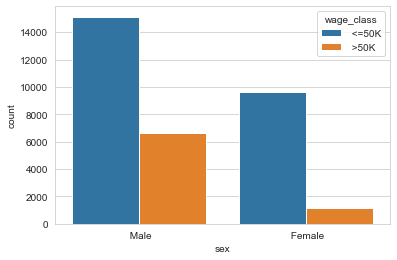

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot('sex',data=train_set,hue='wage_class')

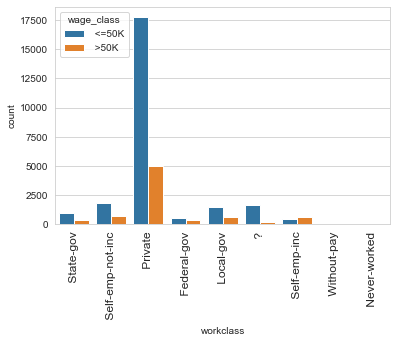

In [36]:
g=sns.countplot('workclass',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(),fontsize=12,rotation=90 )
plt.show()

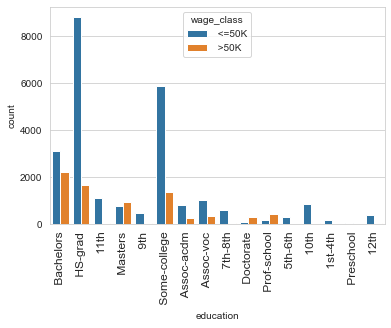

In [37]:
g=sns.countplot('education',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(),fontsize=12,rotation=90 )
plt.show()

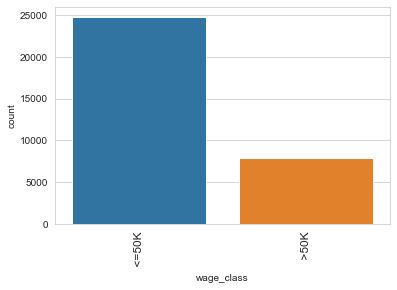

In [38]:
g=sns.countplot('wage_class',data=train_set)
g.set_xticklabels(g.get_xticklabels(),fontsize=12,rotation=90 )
plt.show()

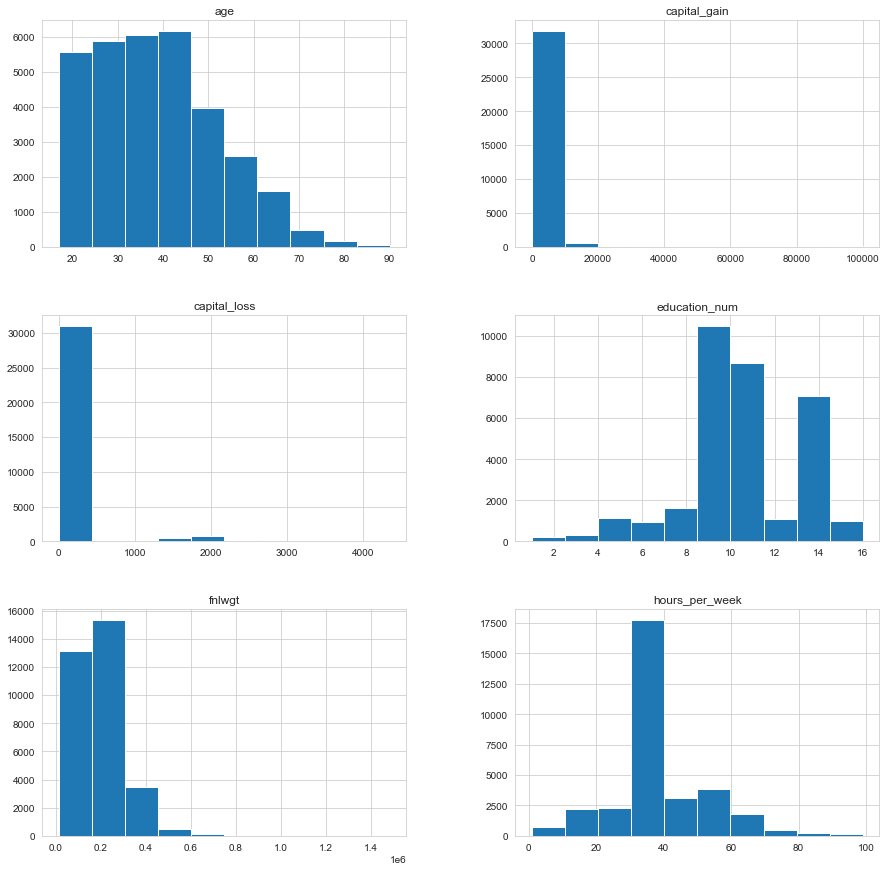

In [39]:
pd.DataFrame.hist(train_set,figsize=[15,15])
plt.show()

In [45]:
x_train = X_train.drop('wage_class',axis=1)
y_train = X_train['wage_class']

In [44]:
x_test = X_test.drop('wage_class',axis=1)
y_test = X_test['wage_class']

In [46]:
X=x_train.values
Y=y_train.values

Xtest=x_test.values
Ytest=y_test.values

In [47]:
Xtest

array([[    25,      0, 226802, ...,      0,     40,      0],
       [    38,      0,  89814, ...,      0,     50,      0],
       [    28,      1, 336951, ...,      0,     40,      0],
       ...,
       [    38,      0, 374983, ...,      0,     50,      0],
       [    44,      0,  83891, ...,      0,     40,      0],
       [    35,      6, 182148, ...,      0,     60,      0]], dtype=int64)

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier

In [57]:
params = {
    'objective':'binary:logistic',
    'max-depth':2 ,
    'Learning-rate':1.0 ,
    'n_estimator':5    
}
params['eval_metric'] = ['logloss' , 'auc']

In [58]:
bst = XGBClassifier(**params).fit(X,Y)

In [60]:
preds = bst.predict(Xtest)
preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
preds_proba = bst.predict_proba(Xtest)
preds_proba

array([[0.9895593 , 0.01044073],
       [0.605003  , 0.394997  ],
       [0.7532468 , 0.2467532 ],
       ...,
       [0.35045725, 0.64954275],
       [0.70369315, 0.29630682],
       [0.41507035, 0.58492965]], dtype=float32)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12435
           1       0.80      0.48      0.60      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.83      0.72      0.75     16281
weighted avg       0.84      0.85      0.84     16281



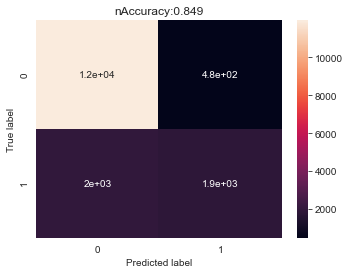

In [72]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,roc_curve 



# Creates a confusion matrix
cm = confusion_matrix(Ytest, preds) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('nAccuracy:{0:.3f}'.format(accuracy_score(Ytest, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [77]:
Ytest.shape

(16281,)

In [78]:
preds_proba.shape

(16281, 2)